Load package, provide file locations, and create list of variables (`vars`) 

In [1]:
import JuliaCompare as J
import PromulaDBA as P
import JuliaCompare: db_files, Canada
using CSV, DataFrames, DataFramesMeta

BASE_FOLDER = raw"\\Purple\c\2020CanadaBanyan"
BASE_FOLDER2 = raw"\\Purple\c\2020BetaJulia"
SCENARIO1 = "Ref23"
SCENARIO2 = "Ref23"

CODE_FOLDER = joinpath(BASE_FOLDER, "Engine")
DATA_FOLDER1 = joinpath(BASE_FOLDER, "2020Model")
DATA_FOLDER2 = joinpath(BASE_FOLDER2, "2020Model", SCENARIO2)
E2020_Folder = joinpath(BASE_FOLDER, "2020Model")

vars = J.list_vars(CODE_FOLDER, DATA_FOLDER1, db_files);
loc1 = J.Loc(vars, DATA_FOLDER1);
loc2 = joinpath(DATA_FOLDER2, "database.hdf5");
loc3 = joinpath(DATA_FOLDER1, "database.hdf5");

cfilename is: 2020DB cfile is: \\Purple\c\2020CanadaBanyan\2020Model\2020db.dba
cfilename is: CCalDB cfile is: \\Purple\c\2020CanadaBanyan\2020Model\Cinput.dba
cfilename is: CInput cfile is: \\Purple\c\2020CanadaBanyan\2020Model\Cinput.dba
cfilename is: COutput cfile is: \\Purple\c\2020CanadaBanyan\2020Model\Cinput.dba
cfilename is: ECalDB cfile is: \\Purple\c\2020CanadaBanyan\2020Model\Einput.dba
cfilename is: EGCalDB cfile is: \\Purple\c\2020CanadaBanyan\2020Model\Einput.dba
cfilename is: EGInput cfile is: \\Purple\c\2020CanadaBanyan\2020Model\Einput.dba
cfilename is: EGOutput cfile is: \\Purple\c\2020CanadaBanyan\2020Model\Einput.dba
cfilename is: EInput cfile is: \\Purple\c\2020CanadaBanyan\2020Model\Einput.dba
cfilename is: EOutput cfile is: \\Purple\c\2020CanadaBanyan\2020Model\Einput.dba
cfilename is: ICalDB cfile is: \\Purple\c\2020CanadaBanyan\2020Model\Iinput.dba
cfilename is: IInput cfile is: \\Purple\c\2020CanadaBanyan\2020Model\Iinput.dba
cfilename is: IOutput cfile is: \\

In [5]:
df = J.var("SOutput/NcFPol", loc3) # No difference in lubricants co2


ErrorException: unable to determine if \\Purple\c\2020CanadaBanyan\2020Model\database.hdf5 is accessible in the HDF5 format (file may not exist)

In [4]:
df = J.diff("SOutput/NcFPol", loc3, loc2; name1 = "Promula", name2 = "Julia")
@rsubset df :Year > 2020 :Year <2051 :Area == "AB" :Fuel == "Lubricants" :Poll == "CO2"

ErrorException: unable to determine if \\Purple\c\2020CanadaBanyan\2020Model\database.hdf5 is accessible in the HDF5 format (file may not exist)

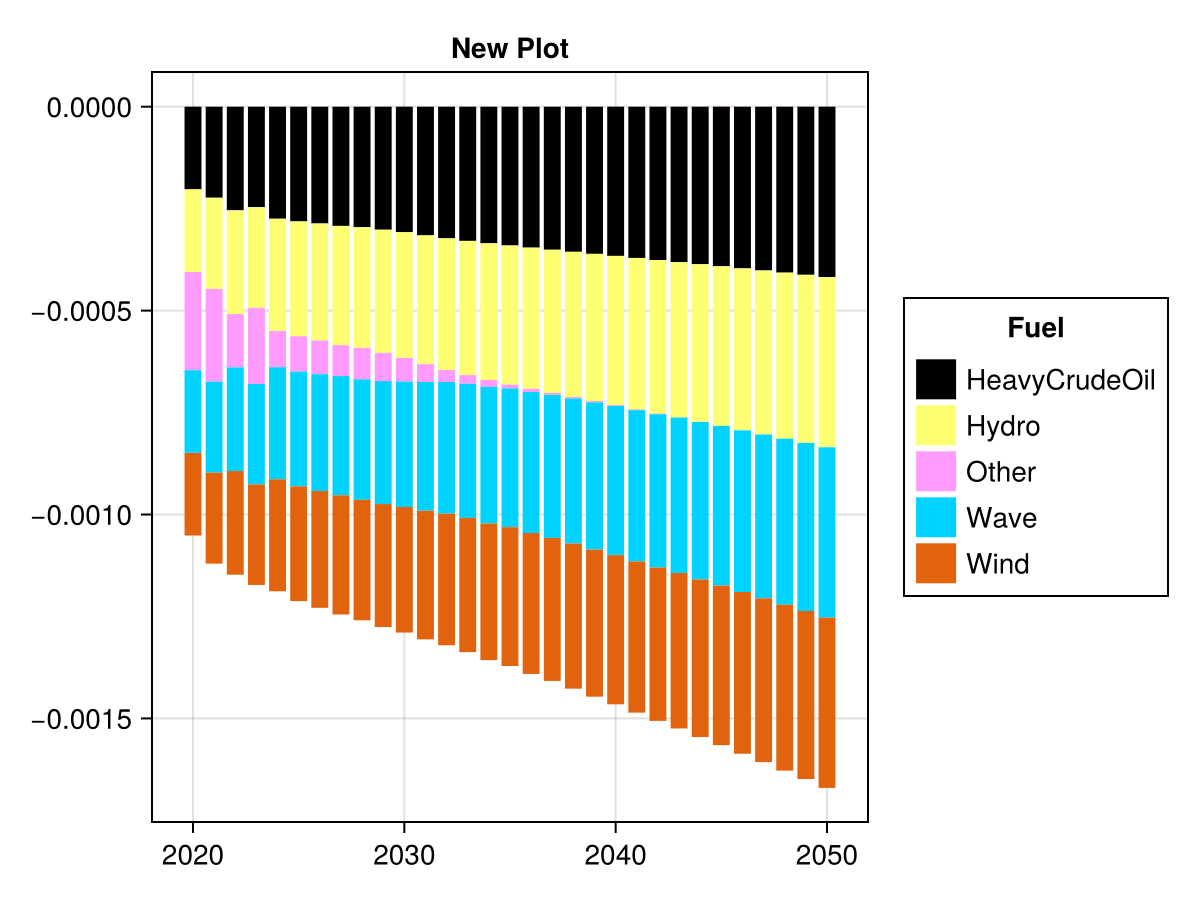

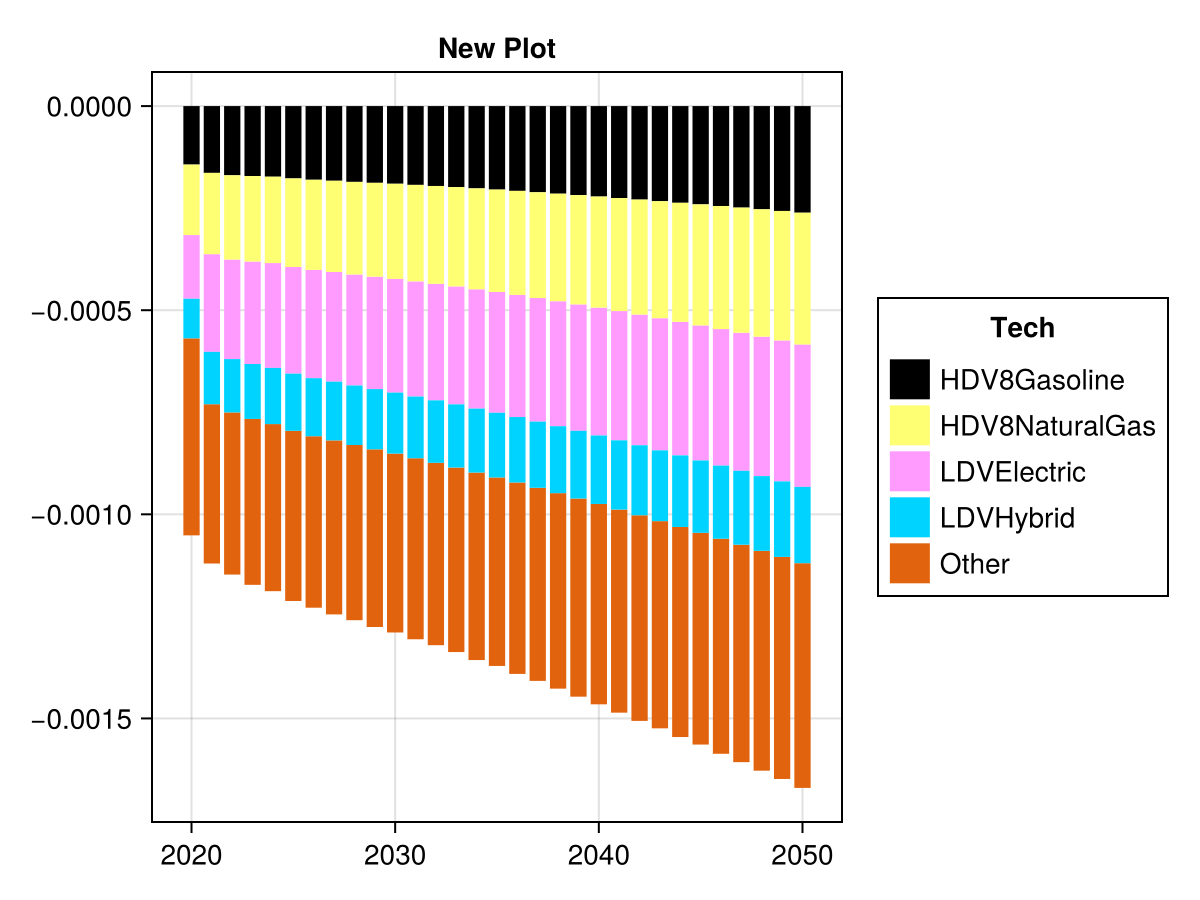

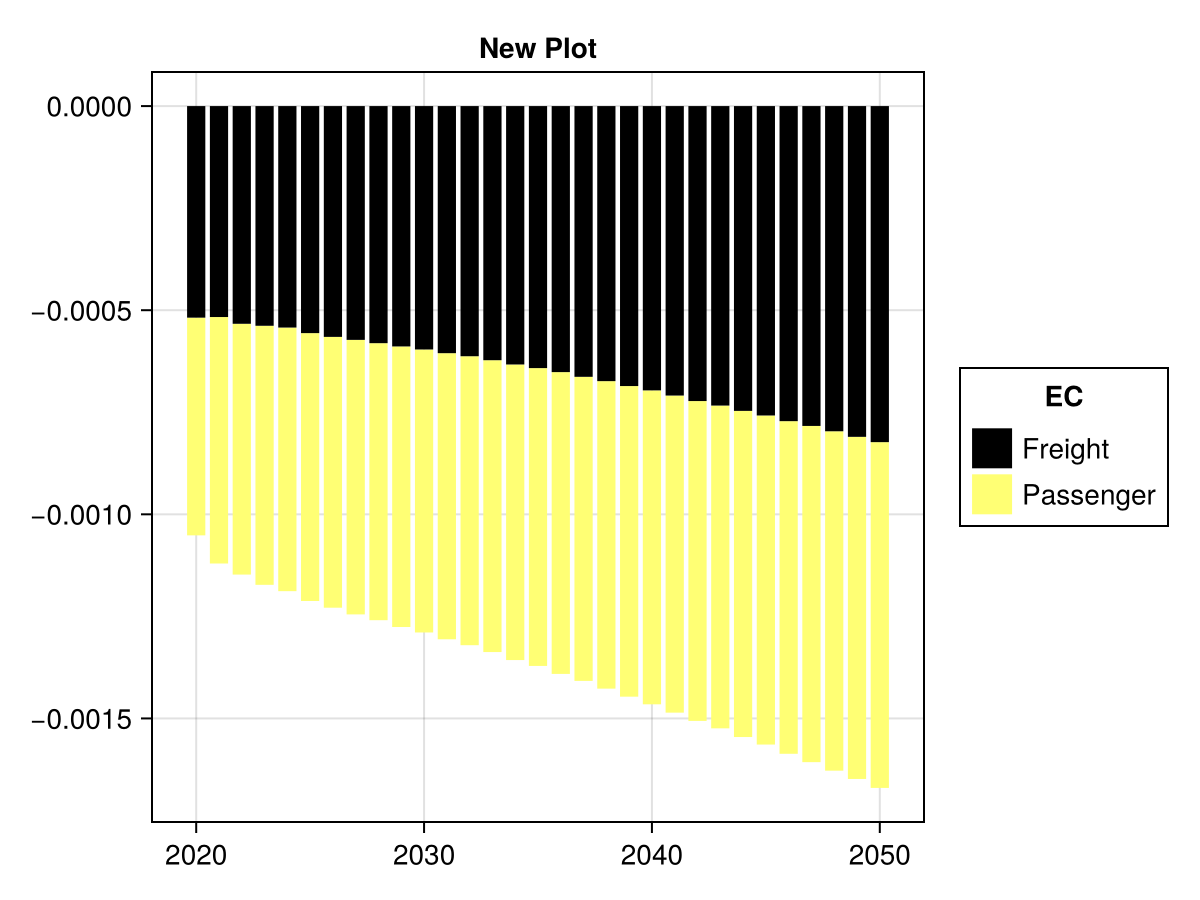

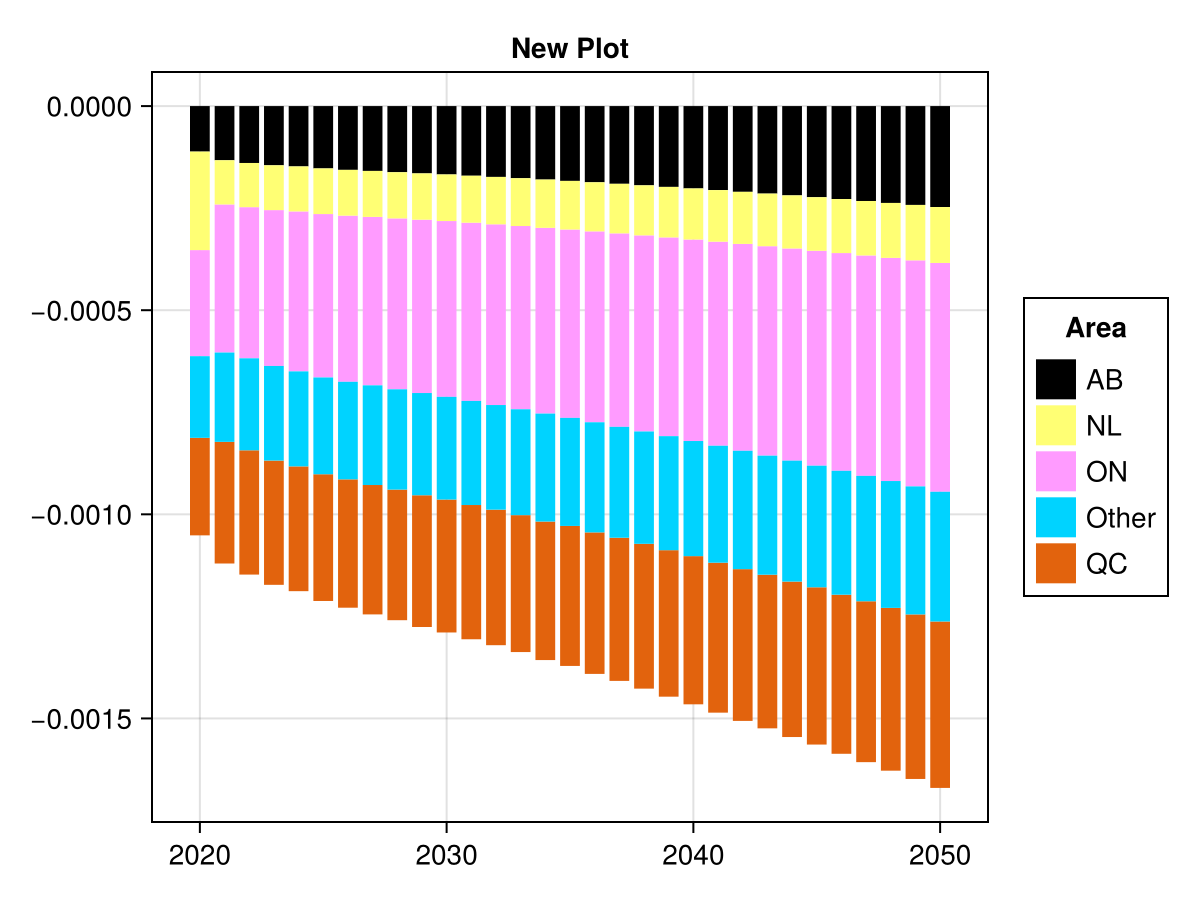

In [28]:
@rsubset! df :Diff != 0
for i in names(df)[1:end-4]
  J.plot_diff(df; dim=i, num=4)   # Freight, Passenger
end

In [ ]:
J.plot_diff(df; dim="ECC", num=4)   # Freight, Passenger
J.plot_diff(df; dim="Area", num=15) # All
J.plot_diff(df; dim="Poll", num=5)  # CO2

In [20]:
@by(df, by = "Area", :Diff = sum(abs.(:Diff)))

Row,Area,Diff
,String,Float64
1,ON,5.09303e6
2,QC,2.87347e5
3,BC,1.80149e5
4,AB,1.30789e6
5,MB,1.017e5
6,SK,44267.3
7,NB,24648.3
8,NS,49254.5
9,NL,16050.2


With that done, we can load any variable into Julia with a simple `var` call and compare the two versions of those variables with `diff`.

In [1]:
totpol_ref = J.var("TotPol", loc1);
totpol_ag = J.var("TotPol", loc2);

totpol_diff = J.diff(totpol_ref, totpol_ag; name1="ref", name2="ag");
first(totpol_diff, 5)


UndefVarError: UndefVarError: `J` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

Now that we have the dataframe with the differences we can determine where the differences are. Let's look at how they overall using `hist_diff`.

In [2]:
J.hist_diff(totpol_diff; dim="Area")

UndefVarError: UndefVarError: `J` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

There differences across quite a few areas. How about ECCs?

In [3]:
J.hist_diff(totpol_diff;dim="ECC")

UndefVarError: UndefVarError: `J` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

There's one ECC that's causing all the issues. Let's see how it looks over years.

In [4]:
subset!(totpol_diff, :Year => x -> x .>= 2020)
J.plot_diff(totpol_diff; dim = "ECC", num = 20)

UndefVarError: UndefVarError: `subset!` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [5]:
totpol_diff

UndefVarError: UndefVarError: `totpol_diff` not defined in `Main`
Suggestion: check for spelling errors or missing imports.